# Week 2: Data Exploration

With my interest in affordable housing development, I am interested in the current distribution of affordable housing in California and Los Angeles, and how funding is prioritized for certain neighborhoods and should affirmatively further fair housing. By identifying whether each census tract is an area of highest resource, high resource, moderate resource, low resource, or high segregation and poverty, the [CTCAC/HCD Opportunity Area Maps](https://www.treasurer.ca.gov/ctcac/opportunity.asp) helps incentivize equitable development patterns by informing where funding should be allocated for affordable housing projects using tax credits and other state funding programs in higher-opportunity areas. Historically, we know that lower income, communities of color have had the disproportionate burden of these housing units being allocated in their areas.


In [195]:
# Like Week 2 Lab, I will be using and importing the geopandas library
import pandas as pd
import geopandas as gpd
# I have now successfully imported the geopandas library

In [196]:
# Reading and adding my data to this notebook. My data is in the form of a shapefile.
OpportunityMap = gpd.read_file('final_2023_shapefile.zip')
# The data has now been imported as the OpportunityMap variable

### Preliminary Data Findings

In [197]:
# Checking the data type. It is a geopandas geodataframe (aka data that is in a table format).
type(OpportunityMap)

geopandas.geodataframe.GeoDataFrame

In [198]:
# Checking to see what the data looks like with the first 6 rows of data. I can also begin to see the types of columns in the data.
OpportunityMap.head(6)

,fips,fips_bg,cnty_nm,countyd,region,ecn_dmn,env_hl_,ed_domn,index,oppcat,geometry
0,06001400100,None,Alameda,06001,Bay Area Region,0.796927,0.927856,0.787575,0.590095,Highest Resource,"POLYGON ((-122.23418 37.85254, -122.23428 37.8..."
1,06001400200,None,Alameda,06001,Bay Area Region,0.960588,0.627255,0.810955,0.701320,Highest Resource,"POLYGON ((-122.25253 37.85110, -122.25094 37.8..."
2,06001400300,None,Alameda,06001,Bay Area Region,0.927188,0.619238,0.324649,0.210942,High Resource,"POLYGON ((-122.26417 37.83787, -122.26427 37.8..."
3,06001400400,None,Alameda,06001,Bay Area Region,0.872411,0.657983,0.523046,0.358539,High Resource,"POLYGON ((-122.26081 37.84869, -122.26023 37.8..."
4,06001400500,None,Alameda,06001,Bay Area Region,0.759519,0.698063,0.566466,0.310218,High Resource,"POLYGON ((-122.26023 37.85274, -122.26081 37.8..."
5,06001400600,None,Alameda,06001,Bay Area Region,0.861055,0.617902,0.324649,0.141811,Moderate Resource,"POLYGON ((-122.26807 37.84414, -122.26607 37.8..."


In [199]:
# Checking to see what the data looks like with the last 6 rows of data. The rows are currently in alphabetical order by county name and
# corresponding county id.
OpportunityMap.tail(6)

,fips,fips_bg,cnty_nm,countyd,region,ecn_dmn,env_hl_,ed_domn,index,oppcat,geometry
10130,06115041000,061150410004,Yuba,06115,Rural Areas,0.878049,0.121951,0.487805,0.095763,High Resource,"POLYGON ((-121.60128 39.21917, -121.57788 39.2..."
10131,06115041000,061150410005,Yuba,06115,Rural Areas,NaN,NaN,NaN,NaN,None,"POLYGON ((-121.63631 39.24941, -121.63581 39.2..."
10132,06115041100,061150411001,Yuba,06115,Rural Areas,0.292683,0.878049,0.414634,-0.079483,Moderate Resource,"POLYGON ((-121.27892 39.49773, -121.27724 39.5..."
10133,06115041100,061150411002,Yuba,06115,Rural Areas,0.536585,0.878049,0.829268,0.321475,Highest Resource,"POLYGON ((-121.32330 39.36354, -121.32129 39.3..."
10134,06115041100,061150411003,Yuba,06115,Rural Areas,0.073171,0.878049,0.658537,-0.165002,Moderate Resource,"POLYGON ((-121.28387 39.46216, -121.27864 39.4..."
10135,06115041100,061150411004,Yuba,06115,Rural Areas,NaN,NaN,NaN,NaN,None,"POLYGON ((-121.37257 39.37358, -121.37048 39.3..."


In [200]:
# To check how many columns and rows are in this data, I can use the .shape command.
OpportunityMap.shape

(10136, 11)

In [201]:
# I see that there are 10,136 rows and 11 columns in the data.

In [202]:
# Looking at the data types for each column in the data by using the dtypes command
OpportunityMap.dtypes

fips          object
fips_bg       object
cnty_nm       object
countyd       object
region        object
ecn_dmn      float64
env_hl_      float64
ed_domn      float64
index        float64
oppcat        object
geometry    geometry
dtype: object

In [203]:
# I see that there are a variety of data types: objects, float 64 (these are the decimal numbers), and geometry

In [204]:
# Using the info() command will give me more specific information about my data
OpportunityMap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fips      10136 non-null  object  
 1   fips_bg   3093 non-null   object  
 2   cnty_nm   10136 non-null  object  
 3   countyd   10136 non-null  object  
 4   region    10136 non-null  object  
 5   ecn_dmn   9747 non-null   float64 
 6   env_hl_   9747 non-null   float64 
 7   ed_domn   9747 non-null   float64 
 8   index     9233 non-null   float64 
 9   oppcat    9747 non-null   object  
 10  geometry  10133 non-null  geometry
dtypes: float64(4), geometry(1), object(6)
memory usage: 871.2+ KB


In [205]:
# Here we also see the non-null count, for which cells are or are not empty (have values)

In [206]:
# I am interested in seeing the how many census tracts are in each opportunity map category and if there is an imbalance
# between the areas of higher opportunity vs. the areas of lesser opportunity. To figure out how census tracts are in each
# category, I can use the value_counts() command, isolating the 'oppcat' column.

OpportunityMap['oppcat'].value_counts()

Low Resource                  2590
Moderate Resource             2564
Highest Resource              2053
High Resource                 2026
High Segregation & Poverty     514
Name: oppcat, dtype: int64

In [207]:
# There are 2053 census tracts indicated as highest resource, while 2590 are low resource and 514 are areas of high segregation and poverty. 
# As such, there is a geographic tendency for the majority of census tracts in California to lean towards being less resourced.

<AxesSubplot: >

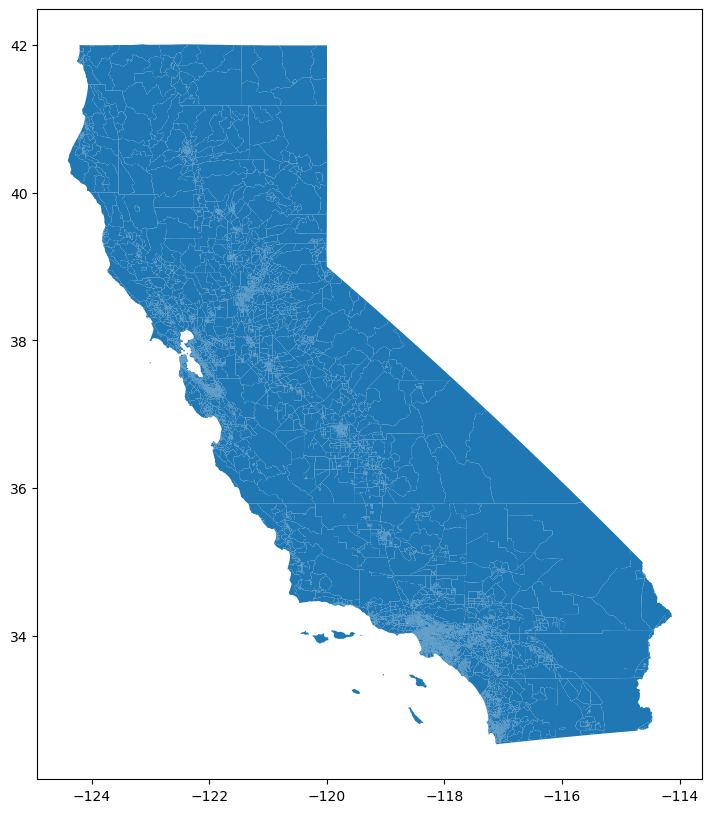

In [209]:
# I can now try to visualize my data by using the plot command that use the information in the geometry column that is in the shapefile.
OpportunityMap.plot(
    figsize=(20,10)
)

In [210]:
# # I noticed that we have polygons, instead of points which explains why the plot graph output down below shows the geographic scope of each
# individual census tract rather than a single point, producing a map of California.

In [211]:
# To focus our research and data onto a smaller geographic scale (ex. Los Angeles County), I could add additional arguments to make the plot
# more defined towards our research scope. For example, I would like to see the plot graph for areas in and around Los Angeles County
# that are the highest resource areas to demonstrate where funding for affordable housing development should be allocated towards.
# First, I should filter the data by the 'oppcat' column for rows that are highest resource.

OpportunityMap[OpportunityMap.oppcat == 'Highest Resource']

,fips,fips_bg,cnty_nm,countyd,region,ecn_dmn,env_hl_,ed_domn,index,oppcat,geometry
0,06001400100,None,Alameda,06001,Bay Area Region,0.796927,0.927856,0.787575,0.590095,Highest Resource,"POLYGON ((-122.23418 37.85254, -122.23428 37.8..."
1,06001400200,None,Alameda,06001,Bay Area Region,0.960588,0.627255,0.810955,0.701320,Highest Resource,"POLYGON ((-122.25253 37.85110, -122.25094 37.8..."
34,06001403800,None,Alameda,06001,Bay Area Region,0.893788,0.642619,0.760855,0.585829,Highest Resource,"POLYGON ((-122.24508 37.81800, -122.24508 37.8..."
39,06001404200,None,Alameda,06001,Bay Area Region,0.749499,0.861055,0.925184,0.687113,Highest Resource,"POLYGON ((-122.24329 37.83006, -122.24696 37.8..."
40,06001404300,None,Alameda,06001,Bay Area Region,0.911824,0.806279,0.831663,0.702400,Highest Resource,"POLYGON ((-122.23408 37.85252, -122.23071 37.8..."
...,...,...,...,...,...,...,...,...,...,...,...
10122,06115040901,061150409011,Yuba,06115,Rural Areas,0.634146,0.487805,0.902439,0.451098,Highest Resource,"POLYGON ((-121.58340 39.13619, -121.58249 39.1..."
10126,06115040902,061150409023,Yuba,06115,Rural Areas,0.560976,0.853659,0.926829,0.510675,Highest Resource,"POLYGON ((-121.33863 39.08801, -121.33595 39.1..."
10127,06115041000,061150410001,Yuba,06115,Rural Areas,1.000000,0.121951,0.512195,0.231388,Highest Resource,"POLYGON ((-121.41390 39.22871, -121.40965 39.2..."
10129,06115041000,061150410003,Yuba,06115,Rural Areas,0.951220,0.121951,0.878049,0.542419,Highest Resource,"POLYGON ((-121.51084 39.23150, -121.51027 39.2..."


In [212]:
# I will save this as a new variable 'HighestOppTracts'
HighestOppTracts = OpportunityMap[OpportunityMap.oppcat == 'Highest Resource']

<AxesSubplot: >

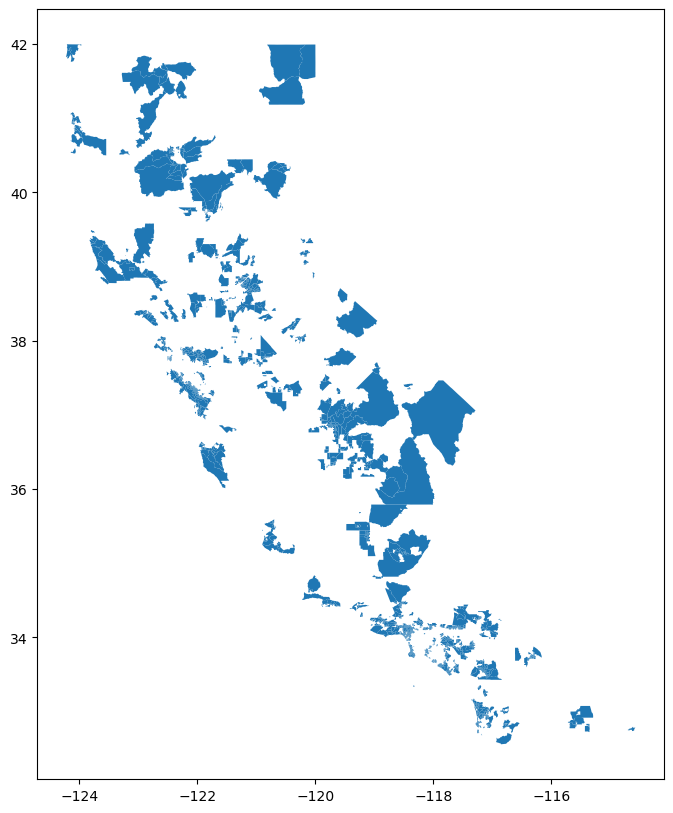

In [213]:
# Before zooming into Los Angeles County, I can plot the new variable to see the geographic distribution of the highest resource 
# census tracts in the entire state of California
HighestOppTracts.plot(
        figsize=(20,10)
)

In [214]:
# The plot above shows all the census tracts in California designated as highest resource areas.

(-118.9, -117.85)

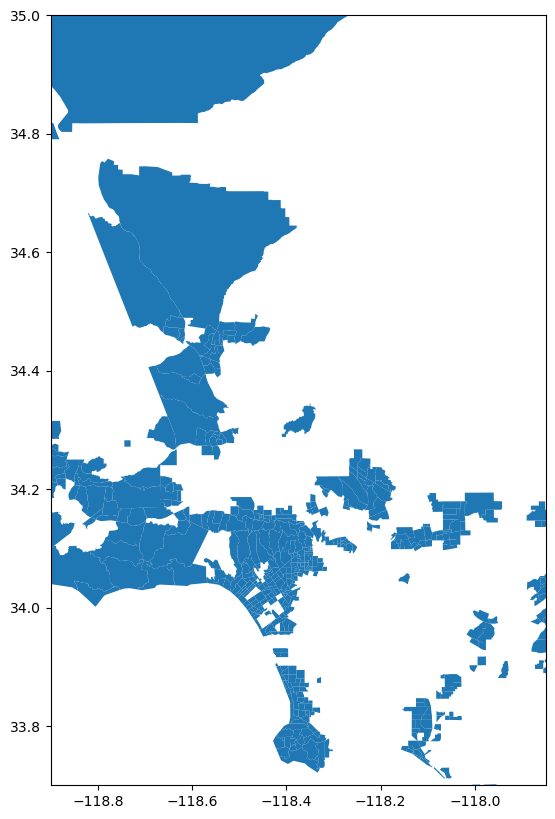

In [215]:
# Now, I will try to add additional arguments/code to zoom the map into Los Angeles County and restrict the plot by coordinates that 
# represent Los Angeles county. I searched online on how to do this and found this information: 
# https://stackoverflow.com/questions/58014498/how-to-restrict-a-geopandas-plot-by-coordinates

import matplotlib.pyplot as plt

# According to the advice, I imported Matplotlib and should create an Axes object and plot the map
fig, ax = plt.subplots(figsize=(20, 10))
HighestOppTracts.plot(ax=ax)

# Now I use the set_ylim and set_xlim commands to restrict the x and y axix towards Los Angeles County
ax.set_ylim(33.70, 35)
ax.set_xlim(-118.9,-117.85)

In [217]:
# The final results produces a plot graph that zooms into Los Angeles County specifically, showing the census tract areas that are
# designated as highest opportunity areas. From these results, we see a large clustering and concentration of these areas on the west side
# of Los Angeles county, showing where we should prioritize affordable housing development funding.